<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Col

<ipython-input-46-a78a4df4be77>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank.replace({'Geography' : {'France' : 2 ,'Germany':1 ,'Spain':0 }},inplace = True)
<ipython-input-46-a78a4df4be77>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank.replace({'Gender' :{'Male': 0 ,'Female':1}},inplace=True)


[[2410    4]
 [ 540   46]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2414
           1       0.92      0.08      0.14       586

    accuracy                           0.82      3000
   macro avg       0.87      0.54      0.52      3000
weighted avg       0.84      0.82      0.75      3000

[[441 186]
 [167 429]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       627
           1       0.70      0.72      0.71       596

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223

[[1763  616]
 [ 628 1771]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2379
           1       0.74      0.74      0.74      2399

    accuracy                           0.74      4778
   macro avg       0.74      0.74      0.74      47

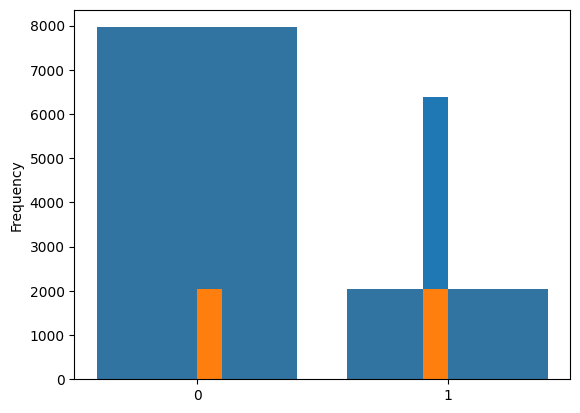

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

bank = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Bank%20Churn%20Modelling.csv')

bank.head()
bank.info()
bank.duplicated('CustomerId').sum()

bank = bank.set_index('CustomerId')

bank.info()

bank['Geography'].value_counts()

bank.replace({'Geography' : {'France' : 2 ,'Germany':1 ,'Spain':0 }},inplace = True)

bank['Gender'].value_counts()

bank.replace({'Gender' :{'Male': 0 ,'Female':1}},inplace=True)

bank['Num Of Products'].value_counts()

bank.replace({'Num Of Products' : {1:0,2:1,3:1,4:1}},inplace = True)

#bank.head(20)

bank.loc[(bank['Balance'])==0,'Churn'].value_counts()

bank['Zero Balance'] =np.where(bank['Balance']>0 , 1,0)

#bank.head(10)

bank['Zero Balance'].hist()

bank['Zero Balance'].value_counts()

bank.groupby(['Churn','Geography']).count()

bank.columns

x= bank.drop(['Surname','Churn'],axis=1)

y=bank['Churn']

x.shape ,y.shape

bank['Churn'].value_counts()

sns.countplot(x='Churn', data = bank)

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=2529)


x_rus,y_rus = rus.fit_resample(x,y)

x_rus.shape,y_rus.shape

y.value_counts()

y_rus.value_counts()

y_rus.plot(kind='hist')


from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=2529)

x_ros,y_ros = ros.fit_resample(x,y)

x_ros.shape,y_ros.shape ,x.shape,y.shape


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=2529)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x_rus,y_rus,test_size =0.3 ,random_state=2529)

x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x_ros,y_ros,test_size =0.3 ,random_state=2529)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train[['CreditScore','Age','Balance','Estimated Salary']] = ss.fit_transform(x_train[['CreditScore','Age','Balance','Estimated Salary']])

x_test[['CreditScore','Age','Balance','Estimated Salary']] = ss.fit_transform(x_test[['CreditScore','Age','Balance','Estimated Salary']])


x_train_rus[['CreditScore','Age','Balance','Estimated Salary']] = ss.fit_transform(x_train_rus[['CreditScore','Age','Balance','Estimated Salary']])

x_test_rus[['CreditScore','Age','Balance','Estimated Salary']] = ss.fit_transform(x_test_rus[['CreditScore','Age','Balance','Estimated Salary']])


x_train_ros[['CreditScore','Age','Balance','Estimated Salary']] = ss.fit_transform(x_train_ros[['CreditScore','Age','Balance','Estimated Salary']])

x_test_ros[['CreditScore','Age','Balance','Estimated Salary']] = ss.fit_transform(x_test_ros[['CreditScore','Age','Balance','Estimated Salary']])

from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train_rus,y_train_rus)

y_pred = svc.predict(x_test_rus)

from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test_rus,y_pred))

print(classification_report(y_test_rus,y_pred))



from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train_ros,y_train_ros)

y_pred_ros = svc.predict(x_test_ros)

from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test_ros,y_pred_ros))

print(classification_report(y_test_ros,y_pred_ros))

from sklearn.model_selection import GridSearchCV


param_grid = {'C' : [0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

grid_rus.fit(x_train_rus,y_train_rus)

print(grid_rus.best_estimator_)

grid_pred = grid_rus.predict(x_test_rus)

print(confusion_matrix(y_test_rus,grid_pred))

print(classification_report(y_test_rus,grid_pred))


param_grid = {'C' : [0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

grid_ros.fit(x_train_ros,y_train_ros)

print(grid_ros.best_estimator_)

grid_pred = grid_ros.predict(x_test_ros)

print(confusion_matrix(y_test_ros,grid_pred))

print(classification_report(y_test_ros,grid_pred))













